# Generator

In [26]:
def generate(ite,youso,func,i=0):
    print(func(*youso))
    if i < ite:
        yield func(*youso)
        return generate(ite,youso,func,i)
    else:
        return func(*youso)
    i += 1

In [57]:
def pow_calc(num,ite,i=0):
    i += 1
    print("a")
    num = num*2
    yield num
    if i == ite:
        pass
    else:
        return pow_calc(num,ite,i)

In [62]:
a = pow_calc(1,10)
print(a)

<generator object pow_calc at 0x00000199A33A94C8>


In [1]:
import numpy as np

In [52]:
%%timeit
n_squares = 65
indices_of_squares = np.arange(n_squares,dtype=np.uint64)#.astype(np.uint64)
board_ndarray = 2**indices_of_squares-1
#print("最後のマスの小麦の数：{}".format(board_ndarray[-1])) # 9223372036854775808
#board_ndarray

5.43 µs ± 822 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [40]:
%%timeit
n_squares = 65
indices_of_squares = np.arange(n_squares).astype("uint64")
board_ndarray = 2**indices_of_squares-1
#print("最後のマスの小麦の数：{}".format(board_ndarray[-1])) # 9223372036854775808
#board_ndarray

5.91 µs ± 266 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [48]:
def bloadcast_n_m_ndarray(n, m):
    indices_ndarray = np.arange(n*m).astype(np.uint64)
    n_m_ndarray = 2**indices_ndarray
    
    n_m_ndarray = n_m_ndarray.reshape(n, m)
    return n_m_ndarray

In [46]:
def append_n_m_ndarray(n, m):
    n_squares = n*m
    n_m_ndarray = np.array([])
    
    for i in range(n_squares):
        n_m_ndarray = np.append(n_m_ndarray, 2**i)
        
    n_m_ndarray = n_m_ndarray.reshape(n, m)
    return n_m_ndarray

In [86]:
def create_n_m_ndarray(n, m):
    #ndarrayの元となるリストを作成する
    squares = n*m
    squares_list = [0]*(n*m)
    for i in range(squares):
        squares_list[i] = (i)
    
    #ndarrayを作成する
    n_m_ndarray = np.array(squares_list)
    
    #ndarrayをn×mに変形する
    n_m_ndarray = n_m_ndarray.reshape(n, m)
    
    return n_m_ndarray

In [87]:
def create_n_m_ndarray_(n, m):
    #ndarrayの元となるリストを作成する
    squares = n*m
    squares_list = []
    for i in range(squares):
        squares_list.append(i)
    
    #ndarrayを作成する
    n_m_ndarray = np.array(squares_list)
    
    #ndarrayをn×mに変形する
    n_m_ndarray = n_m_ndarray.reshape(n, m)
    
    return n_m_ndarray

In [91]:
%%timeit
create_n_m_ndarray(1000,1000)

191 ms ± 18.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [92]:
%%timeit
create_n_m_ndarray_(1000,1000)

226 ms ± 34.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [59]:
a = [None]*5

[1, None, None, None, None]

In [ ]:
１３個採点

In [95]:
import math
def baibain(small_volume, big_volume):
    cnt = 0
    transition_list = []

    while small_volume < big_volume:
        small_volume *= 2
        cnt += 1
        transition_list.append(small_volume)
        
    return cnt, transition_list

MARON_VOLUME = 4 * 0.05**3 * math.pi / 3
EARTH_VOLUME = 108331978e+9
SORAR_SYSTEM_VOLUME = 4 * 1.5e+12 **3 * math.pi / 3
TOKYODOME_VOLUME = 1240000
BALL_VOLUME = 4 * 0.07**3 * math.pi / 3

result, transition_list = baibain(MARON_VOLUME, SORAR_SYSTEM_VOLUME)

#print(transition_list)
print("バイバインをかけて{}分後に太陽系を埋め尽くす".format(result*5))

バイバインをかけて675分後に太陽系を埋め尽くす


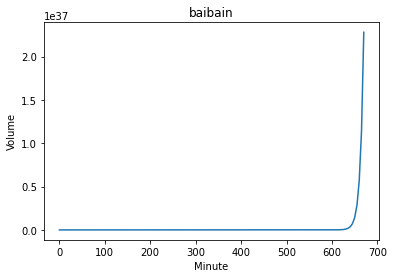

In [101]:
import matplotlib.pyplot as plt
%matplotlib inline

minute_list = [x*5 for x in range(len(transition_list))]
#print(minute_list)
#print(len(minute_list))
#minute_list = [50, 100, 150, 200, 250, 300, 350, 400, 450]

plt.title("baibain")
#plt.hlines(SORAR_SYSTEM_VOLUME, 0,150, color="orange")
plt.xlabel("Minute")
plt.ylabel("Volume")
plt.plot(minute_list,transition_list)
# plt.xticks([100,])
plt.show()

In [26]:
import numpy as np
import seaborn
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import gaussian_mixture

%matplotlib inline

c:\users\goto rei\appdata\local\pypoetry\cache\virtualenvs\youtube-ai-c4g_4yu7-py3.7\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.mixture.gaussian_mixture module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.mixture. Anything that cannot be imported from sklearn.mixture is now part of the private API.
  warnings.warn(message, FutureWarning)


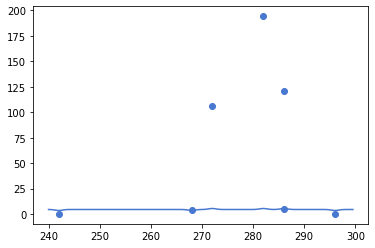

In [25]:
x = np.array([242,268,272,282,286,286,296]).reshape(7,1)
y = np.array([0.1,3.5,106.5,194.3,120.7,5.4,0.1])
x_= np.arange(240,300,0.5).reshape(120,1)

svr = SVR(kernel = "rbf",gamma = 1,C=1,epsilon = 0)
#regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
svr.fit(x,y)
y_=svr.predict(x_)

plt.scatter(x.reshape(-1),y)
plt.plot(x_,y_)
plt.show()

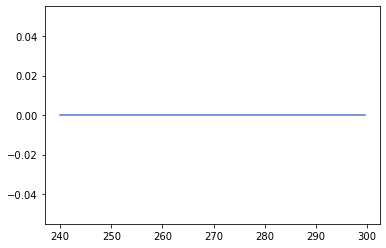

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns

from sklearn.mixture import GaussianMixture
import sklearn.gaussian_process as gp

x = np.array([242,268,272,282,286,286,296]).reshape(7,1)
y = np.array([0.1,3.5,106.5,194.3,120.7,5.4,0.1]).reshape(7,1)
x_= np.arange(240,300,0.5).reshape(120,1)

gmm = GaussianMixture(
    n_components=1,
    covariance_type='spherical'
)

gmm.fit(np.concatenate([x,y],axis=0))
y_ = gmm.predict(x_)

#plt.scatter(x.reshape(-1),y)
plt.plot(x_,y_)
plt.show()

In [42]:
from sklearn.gaussian_process import kernels as sk_kern

In [43]:
kernel = sk_kern.RBF(1.0, (1e-3, 1e3)) + sk_kern.ConstantKernel(1.0, (1e-3, 1e3)) + sk_kern.WhiteKernel()
clf = GaussianProcessRegressor(
    kernel=kernel,
    alpha=1e-10, 
    optimizer="fmin_l_bfgs_b", 
    n_restarts_optimizer=20,
    normalize_y=True)

NameError: name 'GaussianProcessRegressor' is not defined